# imputation-methods

Use the "Run" button to execute the code.

## Imputation of Numeric Data for Data Science in Python
Imputation means filling the missing values in the given dataset. 

There are multiple methods of Imputing missing values. The methods that we'll be looking at in this notebook are
* SimpleImputer (Univariate imputation)
* Iterative Imputer (Multi-variate Imputation)


This notebook contains the Imputation techniques, their brief description and examples of each techniques.

I hope this will be a helpful resource for anyone who is trying to learn data analysis, particularly methods to deal with missing data.

Here is an outline for what we'll do in this project.
* Install and import necessary libraries.
* Download the dataset from kaggle.
* Create a train/test/validation split
* Identify input and target columns
* Identify numeric and categorical columns
* Impute (fill) missing numeric values using multiple techniques


In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="imputation-methods", outputs=['weather-dataset-rattle-package/weatherAUS.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "satyamtiwari1920/imputation-methods" on https://jovian.ai
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "weather-dataset-rattle-package/weatherAUS.csv" (not found)


[jovian] Committed successfully! https://jovian.ai/satyamtiwari1920/imputation-methods


'https://jovian.ai/satyamtiwari1920/imputation-methods'

Let's first install all the necessary libraries.

In [4]:
!pip install pandas numpy matplotlib seaborn opendatasets scikit-learn --quiet --upgrade

Pandas to analysis of data

NumPy for numerical operations on the data

Matplotlib and Seaborn for making charts and plots

opendatasets to download the data from online sources like kaggle.com

scikit-learn for performing machine learning operations

Now that we have installed the libraries, it's time to import these libraries to use them in the notebook.

In [5]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

# Setting display options to view dataframe and charts easily
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']=(12,7)
matplotlib.rcParams['figure.facecolor']='#00000000'

## Downloading the data set

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [6]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: satyamtiwari1920
Your Kaggle Key: ········


100%|██████████| 3.83M/3.83M [00:00<00:00, 47.4MB/s]

While downloading dataset from Kaggle you'll be asked your Kaggle username and Kaggle api key which can be generated from my profile section of your kaggle profile. 

To get you api key find and click on `Create new API token` button in your kaggle profile.

The dataset is downloaded and extrated to the folder `weather-dataset-rattle-package`.

In [7]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [8]:
# loading the dataset using pandas
df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [9]:
# Looking at the dataset
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
# let's check the column types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

When performing data analysis it is important to know which column/columns are our target columns.

In this case our target column is `RainTomorrow`.

We can't impute the values of our target columns as if we do so there will not be any sense of performing the data analysis so it's better to drop the rows which have a missing value for our target column

In [11]:
df.dropna(subset=['RainTomorrow'], inplace= True)

At this stage we can perform some exploratory data analysis on our dataset.

## Preparing the Data for Training

The following are the steps that are followed while preparing dataset for training.

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

In this notebook our focus will mainly be on the 4th step ie. to Impute (Fill) missing numeric values. 

Let's begin with making Training, Validation and Test sets

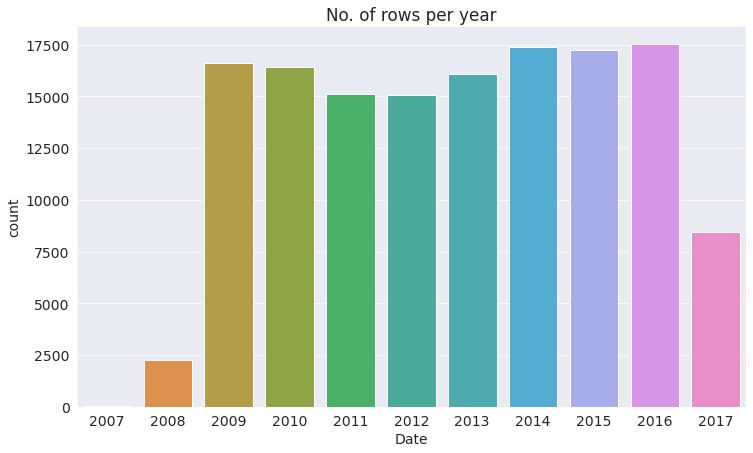

In [12]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

As we have chronological data, it's better to make the training, validation and test sets based on the time. So that the model is trained on past data and validated and tested on future data.

In [13]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year<2015]
val_df =df[year== 2015]
test_df = df[year>2015]

### Input and Target Columns
Let's identify the input and target columns from the dataset.

Input columns are all the columns in the dataset which do not have unique values. In this case the input columns are all the columns expect `Date` and target columns

Target columns/column are the columns which is to be predicted. In this case the target column is `RainTomorrow`

In [14]:
input_cols=list(df.columns)[1:-1]
# as the date column is on index 0 and the target column RainTomorrow is on index -1 we used [1:-1]
target_cols = 'RainTomorrow'

As we are going to use 5 different Imputation techniques we'll make 6 different sets of train_inputs, val_inputs, test_inputs for the purpose of visualization.
In real world scenario as you'll use any one of the methods so you need to create only one set.

In [15]:

train_inputs = train_df[input_cols].copy()
train_inputs1 = train_df[input_cols].copy()
train_inputs2 = train_df[input_cols].copy()
train_inputs3 = train_df[input_cols].copy()
train_inputs4 = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_inputs1 = val_df[input_cols].copy()
val_inputs2 = val_df[input_cols].copy()
val_inputs3 = val_df[input_cols].copy()
val_inputs4 = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_inputs1 = test_df[input_cols].copy()
test_inputs2 = test_df[input_cols].copy()
test_inputs3 = test_df[input_cols].copy()
test_inputs4 = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

Let's now identify the numerical and categorical columns 

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [17]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [18]:
print(categorical_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


# Imputing Missing Values

## Univariate Imputation
This type of imputation imputes the missing values of a feature(column) using the non-missing values of that feature(column)

`SimpleImputer` from `sklearn.impute` is used for univariate imputation of numeric values


Before beginning with the imputation process let's first look at the number of missing values in the numeric columns of the train_input and have a look at some basis statistics for the numeric columns this will include the mean, median(50% value) 

In [19]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [20]:

train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98554.000000,98790.00000,97988.000000,61878.00000,58292.000000,92086.000000,97855.000000,97848.000000,97723.000000,97802.000000,89643.000000,89679.000000,63224.000000,62222.000000,98205.000000,98325.000000
mean,12.002014,23.00288,2.372935,5.28686,7.602136,40.230969,14.102192,18.770430,68.651822,51.501728,1017.518046,1015.138523,4.308048,4.414451,16.827340,21.525622
std,6.345487,6.99008,8.518819,3.95104,3.788266,13.713042,8.994121,8.877497,18.995535,20.742760,7.073083,6.997504,2.867317,2.694295,6.399855,6.832509
min,-8.500000,-4.10000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.80000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.40000,0.000000,4.60000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.500000,20.900000
75%,16.600000,27.90000,0.800000,7.20000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.300000,26.100000
max,33.900000,48.10000,371.000000,82.40000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


There is a Parameter `strategy` in the Simple Imputer function which can have the following values
* "mean"- Fills the missing values with the mean of non missing values
* "median" - Fills the missing values with the median of non missing values
* "most_frequent" - Fills the missing values with the value that occurs most frequently or we can say the mode of the numeric data
* "constant" - Fills the missing with the value provided in `fill_value` parameter of SimpleImputer.

By default the strategy is set to mean.

### SimpleImputer (strategy ='mean')

Lets import `SimpleImputer` from `sklearn.impute`

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# Model Creation
imputer = SimpleImputer(strategy ='mean')
# fitting the imputer on the original dataset
imputer.fit(df[numeric_cols])
# Imputing the missing values in train, validation and test inputs
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

Now let's see the number of missing values in the train_inputs after imputation

In [23]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [24]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,5.469824,7.624853,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,4.437189,4.503167,23.7,31.8
144549,15.1,36.8,0.0,5.469824,7.624853,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,4.437189,4.503167,28.9,34.8
144550,17.3,37.8,0.0,5.469824,7.624853,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,4.437189,4.503167,29.7,35.7
144551,20.1,38.5,0.0,5.469824,7.624853,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,4.437189,4.503167,29.8,37.2


It can be seen in the sunshine column the missing values are now imputed with 7.624853 which is the mean for the sunshine column.

We have filled the missing values with the mean of non missing values of each column.

### SimpleImputer (strategy ='median')

In [25]:
# let's first look at the number of missing values in the numeric columns of the train_input
train_inputs1[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [26]:
# Let's have a look at some basis statistics for the numeric columns this will include the mean, median(50% value) 
train_inputs1[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98554.000000,98790.00000,97988.000000,61878.00000,58292.000000,92086.000000,97855.000000,97848.000000,97723.000000,97802.000000,89643.000000,89679.000000,63224.000000,62222.000000,98205.000000,98325.000000
mean,12.002014,23.00288,2.372935,5.28686,7.602136,40.230969,14.102192,18.770430,68.651822,51.501728,1017.518046,1015.138523,4.308048,4.414451,16.827340,21.525622
std,6.345487,6.99008,8.518819,3.95104,3.788266,13.713042,8.994121,8.877497,18.995535,20.742760,7.073083,6.997504,2.867317,2.694295,6.399855,6.832509
min,-8.500000,-4.10000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.80000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.40000,0.000000,4.60000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.500000,20.900000
75%,16.600000,27.90000,0.800000,7.20000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.300000,26.100000
max,33.900000,48.10000,371.000000,82.40000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


lets import SimpleImputer from sklearn.impute


In [27]:
from sklearn.impute import SimpleImputer

In [28]:
# Model Creation
imputer = SimpleImputer(strategy ='median')
# fitting the imputer on the original dataset
imputer.fit(df[numeric_cols])
# Imputing the missing values in train, validation and test inputs
train_inputs1[numeric_cols]=imputer.transform(train_inputs1[numeric_cols])
val_inputs1[numeric_cols]=imputer.transform(val_inputs1[numeric_cols])
test_inputs1[numeric_cols]=imputer.transform(test_inputs1[numeric_cols])

Now let's see the number of missing values in the train_inputs after imputation

In [29]:
train_inputs1[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [30]:
train_inputs1[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,4.8,8.5,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,5.0,5.0,23.7,31.8
144549,15.1,36.8,0.0,4.8,8.5,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,5.0,5.0,28.9,34.8
144550,17.3,37.8,0.0,4.8,8.5,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,5.0,5.0,29.7,35.7
144551,20.1,38.5,0.0,4.8,8.5,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,5.0,5.0,29.8,37.2


In [31]:
df.Sunshine.median()

8.5

Now using strategy as 'median' we have filled the missing values using the median of the non missing values.

Median is preferred when there are outliers in the data, as outliers do not have an influence on median.

### SimpleImputer (strategy ='most_frequent')

Let's use value_count function to find the most frequent value in sunshine column

In [32]:
df['Sunshine'].value_counts()

0.0     2308
10.7    1087
11.0    1078
10.8    1058
10.5    1018
10.9    1013
10.3     999
10.2     985
10.0     973
11.1     967
10.6     961
10.4     961
9.8      956
10.1     939
9.2      909
11.2     900
9.9      889
9.5      854
9.6      848
9.7      845
9.4      829
9.3      817
9.0      765
9.1      762
11.3     757
8.8      740
8.4      709
11.4     698
8.9      695
8.7      691
8.2      679
8.0      651
11.6     649
8.5      649
8.3      638
7.8      627
7.2      620
13.0     619
8.6      614
8.1      611
12.0     602
11.5     581
11.7     578
13.1     565
7.3      565
12.7     564
7.1      562
13.2     558
7.5      555
11.9     550
7.7      549
11.8     547
7.6      547
12.2     538
0.1      533
6.8      526
6.1      523
6.3      523
6.9      523
12.5     522
7.9      517
7.0      516
6.0      512
7.4      512
0.2      511
6.2      497
12.6     494
6.6      493
6.5      484
12.3     483
12.4     477
5.7      470
12.8     470
6.4      468
5.8      465
5.5      465
12.1     463

It can be seen that 0 occurs the most times in the Sunshine columns.

Let's impute the missing values using strategy as most_frequent

lets import SimpleImputer from sklearn.impute


In [33]:
from sklearn.impute import SimpleImputer

In [34]:
# Model Creation
imputer = SimpleImputer(strategy ='most_frequent')
# fitting the imputer on the original dataset
imputer.fit(df[numeric_cols])
# Imputing the missing values in train, validation and test inputs
train_inputs2[numeric_cols]=imputer.transform(train_inputs2[numeric_cols])
val_inputs2[numeric_cols]=imputer.transform(val_inputs2[numeric_cols])
test_inputs2[numeric_cols]=imputer.transform(test_inputs2[numeric_cols])

In [35]:
train_inputs2[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8
1,7.4,25.1,0.0,4.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3
2,12.9,25.7,0.0,4.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5
4,17.5,32.3,1.0,4.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,4.0,0.0,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,7.0,7.0,23.7,31.8
144549,15.1,36.8,0.0,4.0,0.0,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,7.0,7.0,28.9,34.8
144550,17.3,37.8,0.0,4.0,0.0,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,7.0,7.0,29.7,35.7
144551,20.1,38.5,0.0,4.0,0.0,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,7.0,7.0,29.8,37.2


The missing values in the sunshine column are now replaced with 0 which is the most frequent value

### SimpleImputer (strategy ='constant')

lets import SimpleImputer from sklearn.impute


In [36]:
from sklearn.impute import SimpleImputer

In [37]:
# Model Creation
imputer = SimpleImputer(strategy ='constant', fill_value =20)
# fitting the imputer on the original dataset
imputer.fit(df[numeric_cols])
# Imputing the missing values in train, validation and test inputs
train_inputs3[numeric_cols]=imputer.transform(train_inputs3[numeric_cols])
val_inputs3[numeric_cols]=imputer.transform(val_inputs3[numeric_cols])
test_inputs3[numeric_cols]=imputer.transform(test_inputs3[numeric_cols])

In [38]:
train_inputs3[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,20.0,20.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,20.0,16.9,21.8
1,7.4,25.1,0.0,20.0,20.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,20.0,20.0,17.2,24.3
2,12.9,25.7,0.0,20.0,20.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,20.0,2.0,21.0,23.2
3,9.2,28.0,0.0,20.0,20.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,20.0,20.0,18.1,26.5
4,17.5,32.3,1.0,20.0,20.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,20.0,20.0,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,20.0,20.0,23.7,31.8
144549,15.1,36.8,0.0,20.0,20.0,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,20.0,20.0,28.9,34.8
144550,17.3,37.8,0.0,20.0,20.0,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,20.0,20.0,29.7,35.7
144551,20.1,38.5,0.0,20.0,20.0,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,20.0,20.0,29.8,37.2


All the missing values are replaced by the constant value 20, which is provided by us.

When we use strategy = constant the missing values are filled with the value that we provided as fill_value. If left to default it fills 0 for numeric columns and "missing_value" for string or object datatypes

## Multivariate Feature Imputation

It is more sophisticated approach to impute missing values. It models each feature with missing values as a function of other features and estimates the values to fill in place of missing values

`IterativeImputer` is the function used to impute missing values

## Note 
>This estimator is still experimental for now: default parameters or details of behaviour might change without any deprecation cycle. Resolving the following issues would help stabilize IterativeImputer: convergence criteria (#14338), default estimators (#13286), and use of random state (#15611). To use it, you need to explicitly import enable_iterative_imputer.


Lets import IterativeImputer from sklearn.impute


In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [40]:
# Model Creation
imputer = IterativeImputer()
# fitting the imputer on the original dataset
imputer.fit(df[numeric_cols])
# Imputing the missing values in train, validation and test inputs
train_inputs4[numeric_cols]=imputer.transform(train_inputs4[numeric_cols])
val_inputs4[numeric_cols]=imputer.transform(val_inputs4[numeric_cols])
test_inputs4[numeric_cols]=imputer.transform(test_inputs4[numeric_cols])

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


Now let's see the number of missing values in the train_inputs after imputation

In [41]:
train_inputs4[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [42]:
train_inputs4[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,6.280487,6.998127,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.145859,16.9,21.8
1,7.4,25.1,0.0,6.254494,10.857125,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.915297,2.645441,17.2,24.3
2,12.9,25.7,0.0,8.565610,11.798533,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.020142,2.000000,21.0,23.2
3,9.2,28.0,0.0,6.829046,11.567214,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.188370,1.973883,18.1,26.5
4,17.5,32.3,1.0,7.353549,5.509480,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,10.887596,12.530965,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,1.398188,1.728154,23.7,31.8
144549,15.1,36.8,0.0,10.616839,14.907601,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,-0.765755,0.883177,28.9,34.8
144550,17.3,37.8,0.0,11.784237,13.669456,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,-0.233742,1.739605,29.7,35.7
144551,20.1,38.5,0.0,11.894990,13.462730,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,0.524701,1.537952,29.8,37.2


It can be seen that unlinke other methods where the value for each missing value was same ( either mean, median, mode, constant) the values here for each missing values are different.

There's a parameter in `IterativeImputer` named `initial_strategy` which is same as `strategy` parameter in `SimpleImputer`.

`IterativeImputer(estimator=None, *, missing_values=nan, sample_posterior=False, max_iter=10, tol=0.001, n_nearest_features=None, initial_strategy='mean', imputation_order='ascending', skip_complete=False, min_value=- inf, max_value=inf, verbose=0, random_state=None, add_indicator=False)` is the function for Iterative imputer 



# References 
Here is the list of references where you can find more information about each Imputation technique.


https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

https://scikit-learn.org/stable/modules/impute.html





In [43]:
jovian.commit(project="imputation-methods", outputs=['weather-dataset-rattle-package/weatherAUS.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "satyamtiwari1920/imputation-methods" on https://jovian.ai
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/satyamtiwari1920/imputation-methods


'https://jovian.ai/satyamtiwari1920/imputation-methods'